In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [3]:
data = pd.read_csv('/kaggle/input/spambase/realspambase.data', header = None)
data.rename(columns={57:'label'}, inplace = True)
print(data.shape)
data

(4601, 58)


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


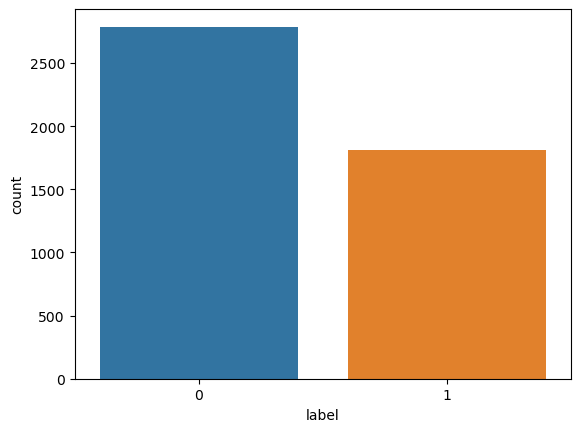

In [4]:
sns.countplot(x = data.label)
Y = data['label']
X = data.drop(['label'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 4601, test_size = 0.3)

In [5]:
# Expert - 1 (XGBoost Classifier)
exp_1 = XGBClassifier()
exp_1.fit(X_train, Y_train)

# Expert - 2 (Logistic Regression)
exp_2 = LogisticRegression(max_iter = 10000)
exp_2.fit(X_train, Y_train)

# Expert - 3 (Random Forest Classifier)
exp_3 = RandomForestClassifier()
exp_3.fit(X_train,Y_train)

# Expert - 4 (Support Vector Classifier)
exp_4 = SVC()
exp_4.fit(X_train,Y_train)

# Expert - 5 (KNN Classifier)
exp_5 = KNeighborsClassifier(n_neighbors = 1)
exp_5.fit(X_train,Y_train)

# Expert - 6 (Naive Bayes Classifier)
exp_6 = MultinomialNB()
exp_6.fit(X_train, Y_train)


MultinomialNB()

In [6]:
pred_1 = exp_1.predict(X_test)
pred_2 = exp_2.predict(X_test)
pred_3 = exp_3.predict(X_test)
pred_4 = exp_4.predict(X_test)
pred_5 = exp_5.predict(X_test)
pred_6 = exp_6.predict(X_test)

accuracy_1 = accuracy_score(Y_test,pred_1)
accuracy_2 = accuracy_score(Y_test,pred_2)
accuracy_3 = accuracy_score(Y_test,pred_3)
accuracy_4 = accuracy_score(Y_test,pred_4)
accuracy_5 = accuracy_score(Y_test,pred_5)
accuracy_6 = accuracy_score(Y_test,pred_6)

print("XGBoost: ", accuracy_1)
print("Logistic: ", accuracy_2)
print("Random Forest: ", accuracy_3)
print("SVC: ", accuracy_4)
print("KNN: ", accuracy_5)
print("Naive Bayes: ", accuracy_6)

XGBoost:  0.946415640839971
Logistic:  0.9160028964518465
Random Forest:  0.944967414916727
SVC:  0.7096307023895728
KNN:  0.8001448225923244
Naive Bayes:  0.776249094858798


In [7]:
# Static Expert Algorithm

# Define the learning rate and number of iterations
eta = 0.3 # Learning Rate
T = 1381 # No. of iterations
R = 20 # Large constant

# Initialize the expert weights, learner loss and expert loss
weights = np.array([1/6] * 6)
loss_learner = []
loss_experts = [[] for i in range(6)]
weight_experts = [[] for i in range(6)]

# Run the static expert algorithm
for t in range(T):
    
    # Predict the labels for each expert and calculate their loss
    test_df = pd.DataFrame(data = X_test.iloc[t:t+1])
    prediction_1 = exp_1.predict(test_df)
    prediction_2 = exp_2.predict(test_df)
    prediction_3 = exp_3.predict(test_df)
    prediction_4 = exp_4.predict(test_df)
    prediction_5 = exp_5.predict(test_df)
    prediction_6 = exp_6.predict(test_df)
    
    y_hat = np.array([prediction_1[0], prediction_2[0], prediction_3[0], prediction_4[0], prediction_5[0], prediction_6[0]])
    y_temp = np.array(Y_test.iloc[t:t+1])
    y_true = np.empty(6) 
    y_true.fill(y_temp[0])
    
    experts_losses = (1/R) * np.abs(y_true - y_hat)
    learner_losses = (1/R) * abs(y_true[0] - sum(np.multiply(weights, y_hat)))

    # Update and normalize the expert weights
    weights *= np.exp(-eta * experts_losses)
    weights /= np.sum(weights)
    
    # Update the learner loss, expert losses and evolution of weights
    loss_learner.append(learner_losses)
    
    for i in range(6):
        loss_experts[i].append(experts_losses[i])
        weight_experts[i].append(weights[i])
               
cum_loss_expert = []

for i in range(6):
    cum_loss_expert.append(np.cumsum(loss_experts[i]))

cum_loss_learner = np.cumsum(loss_learner)

# Print the results
print("Expert weights:", weights)



Expert weights: [0.38636678 0.20577578 0.37494792 0.00286276 0.01866756 0.0113792 ]


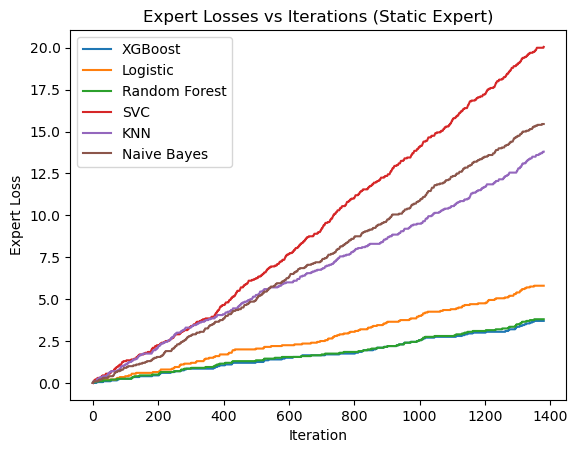

In [8]:
expert_names = ['XGBoost', 'Logistic', 'Random Forest', 'SVC', 'KNN', 'Naive Bayes']

for i in range(6):
    plt.plot(range(T), cum_loss_expert[i], label = expert_names[i])
plt.title("Expert Losses vs Iterations (Static Expert)")
plt.xlabel("Iteration")
plt.ylabel("Expert Loss")
plt.legend()
plt.show()

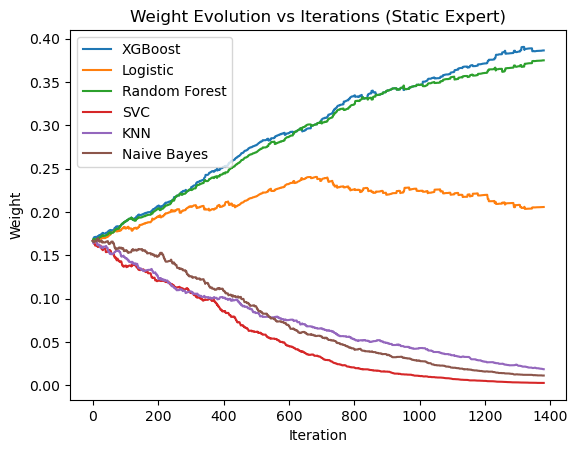

In [9]:
expert_names = ['XGBoost', 'Logistic', 'Random Forest', 'SVC', 'KNN', 'Naive Bayes']

for i in range(6):
    plt.plot(range(T), weight_experts[i], label = expert_names[i])
plt.title("Weight Evolution vs Iterations (Static Expert)")
plt.xlabel("Iteration")
plt.ylabel("Weight")
plt.legend()
plt.show()

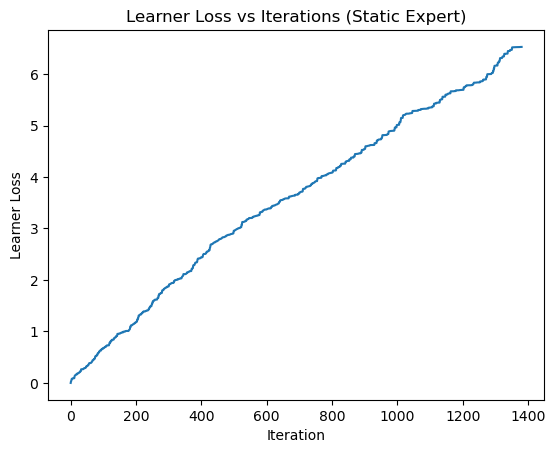

In [10]:
plt.plot(range(T), cum_loss_learner)
plt.title("Learner Loss vs Iterations (Static Expert)")
plt.xlabel("Iteration")
plt.ylabel("Learner Loss")
plt.show()

Expert weights (alpha = 0.25): [0.17297331 0.17263732 0.17229846 0.15491643 0.15942903 0.16774545]


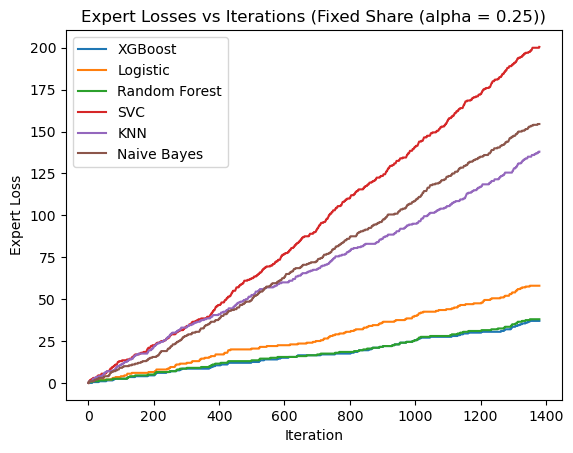

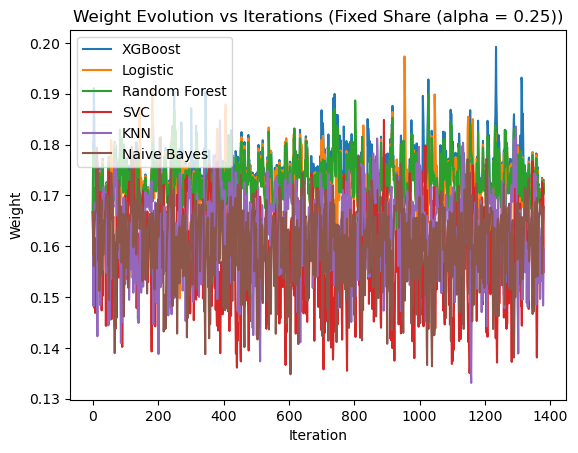

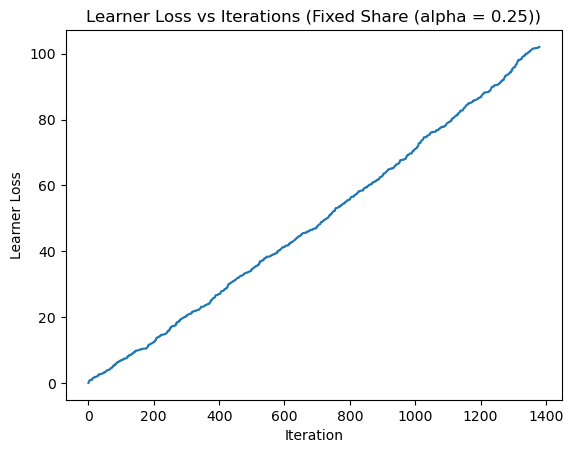

Expert weights (alpha = 0.5): [0.17001499 0.16952657 0.1690302  0.1589275  0.16556344 0.16693731]


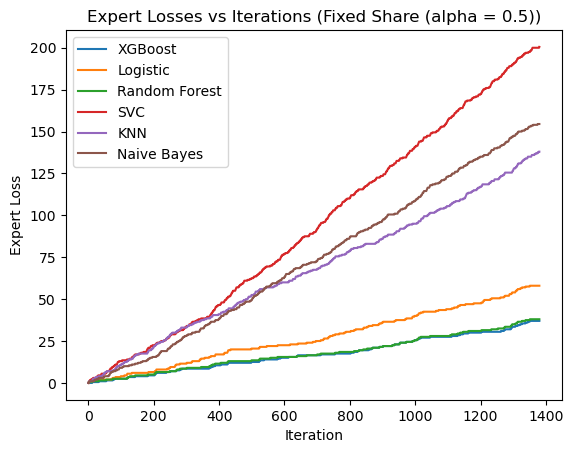

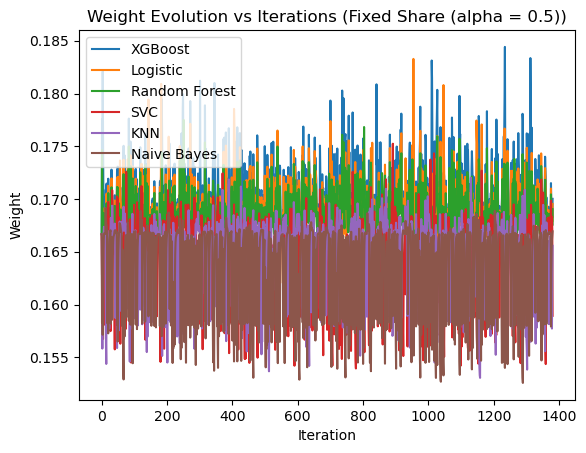

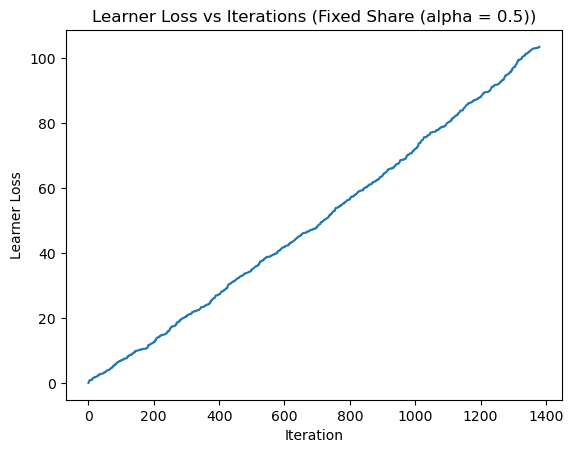

Expert weights (alpha = 0.75): [0.16900346 0.16832259 0.16759938 0.16442302 0.16575915 0.16489239]


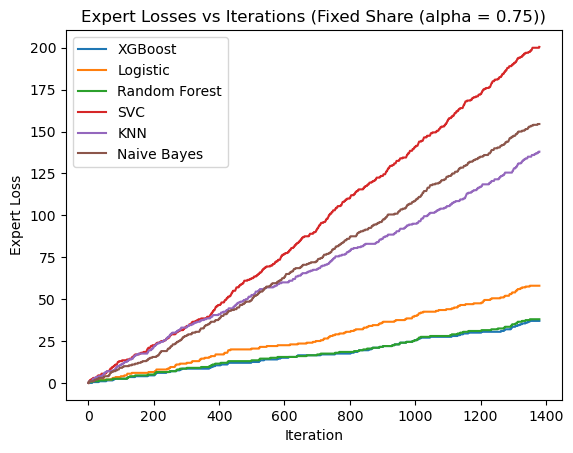

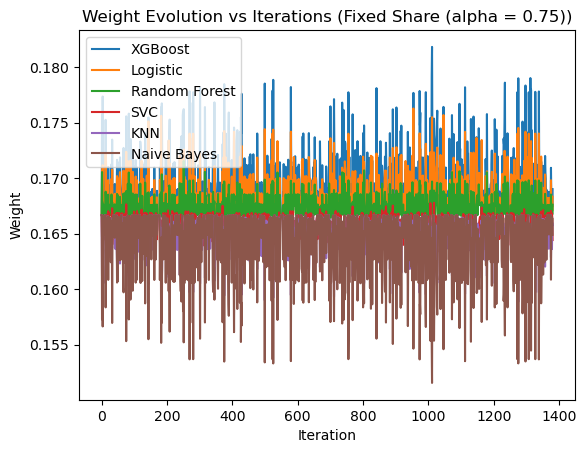

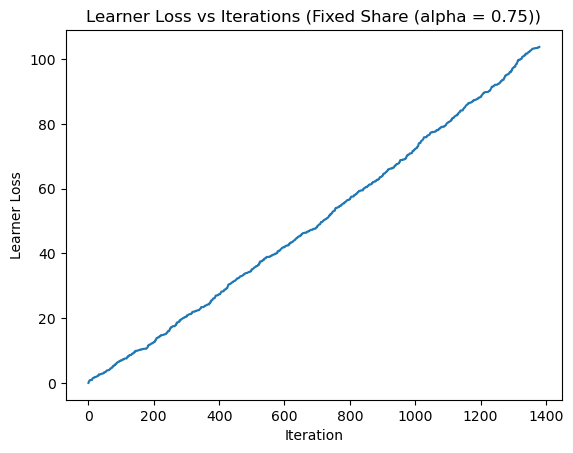

In [11]:
# Fixed share (alpha) Algorithm

def fixed_share(alpha):
    
    # Define the learning rate and number of iterations
    eta = 0.3 # Learning Rate
    T = 1381 # No. of iterations
    R = 2 # Large constant

    # Initialize the expert weights, learner loss and expert loss
    weights = np.array([1/6] * 6)
    loss_learner = []
    loss_experts = [[] for i in range(6)]
    weight_experts = [[] for i in range(6)]

    # Run the static expert algorithm
    for t in range(T):
        
        # Predict the labels for each expert and calculate their loss
        test_df = pd.DataFrame(data = X_test.iloc[t:t+1])
        prediction_1 = exp_1.predict(test_df)
        prediction_2 = exp_2.predict(test_df)
        prediction_3 = exp_3.predict(test_df)
        prediction_4 = exp_4.predict(test_df)
        prediction_5 = exp_5.predict(test_df)
        prediction_6 = exp_6.predict(test_df)
    
        y_hat = np.array([prediction_1[0], prediction_2[0], prediction_3[0], prediction_4[0], prediction_5[0], prediction_6[0]])
        y_temp = np.array(Y_test.iloc[t:t+1])
        y_true = np.empty(6) 
        y_true.fill(y_temp[0])
    
        experts_losses = (1/R) * np.abs(y_true - y_hat)
        learner_losses = (1/R) * abs(y_true[0] - sum(np.multiply(weights, y_hat)))
        
        # Update and normalize the expert weights
        for i in range(6):
            temp = 0
            for j in range(6):
                if i == j:
                    theta_ij = 1 - alpha
                else:
                    theta_ij = alpha / 5
                
                temp = temp + weights[j] * math.exp(-eta * experts_losses[j]) * theta_ij
            
            weights[i] = temp
        
        weights /= np.sum(weights)

        # Update the learner loss and expert losses
        loss_learner.append(learner_losses)
    
        for i in range(6):
            loss_experts[i].append(experts_losses[i])
            weight_experts[i].append(weights[i])               
    
    cum_loss_expert = []

    for i in range(6):
        cum_loss_expert.append(np.cumsum(loss_experts[i]))

    cum_loss_learner = np.cumsum(loss_learner)

    # Print the results
    print(f"Expert weights (alpha = {alpha}):", weights)
    
    expert_names = ['XGBoost', 'Logistic', 'Random Forest', 'SVC', 'KNN', 'Naive Bayes']

    # Expert Losses Vs Iteration 
    for i in range(6):
        plt.plot(range(T), cum_loss_expert[i], label = expert_names[i])
    plt.title(f"Expert Losses vs Iterations (Fixed Share (alpha = {alpha}))")
    plt.xlabel("Iteration")
    plt.ylabel("Expert Loss")
    plt.legend()
    plt.show()
    
    # Weight Evolution Vs Iterations
    for i in range(6):
        plt.plot(range(T), weight_experts[i], label = expert_names[i])
    plt.title(f"Weight Evolution vs Iterations (Fixed Share (alpha = {alpha}))")
    plt.xlabel("Iteration")
    plt.ylabel("Weight")
    plt.legend()
    plt.show()
    
    # Learner Loss Vs. Iterations
    plt.plot(range(T), cum_loss_learner)
    plt.title(f"Learner Loss vs Iterations (Fixed Share (alpha = {alpha}))")
    plt.xlabel("Iteration")
    plt.ylabel("Learner Loss")
    plt.show()

fixed_share(0.25)
fixed_share(0.5)
fixed_share(0.75)